In [8]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [9]:
file_vidq = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/ERA5_analysis/vidq_dt.day.mean.1950-2022.nc"
file_vimfc = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/ERA5_analysis/vimfc.day.mean.1950-2022.nc"


In [10]:
vidq = xr.open_dataarray(file_vidq)
vimfc = xr.open_dataarray(file_vimfc)

In [11]:
vidq_box = vidq.sel(longitude=slice(140, 170), latitude=slice(-40, -10), time=slice('1998-01-01','2019-12-30'))
vimfc_box = vimfc.sel(longitude=slice(140, 170), latitude=slice(-40, -10), time=slice('1998-01-01','2019-12-30'))

In [ ]:
# dir for mac

sst_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/OISST/northeast_sst.nc"
prec_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/TRMM/northeast_precip.nc"
sst_oisst = xr.open_dataarray(sst_file_dir)

sst_oisst = sst_oisst.loc[0: 8034,:, :]

precip = xr.open_dataarray(prec_file_dir)

date_time = pd.date_range(start='1998-01-01', periods=8034, freq='D')

sst_oisst['time'] = date_time

precip['time'] = date_time

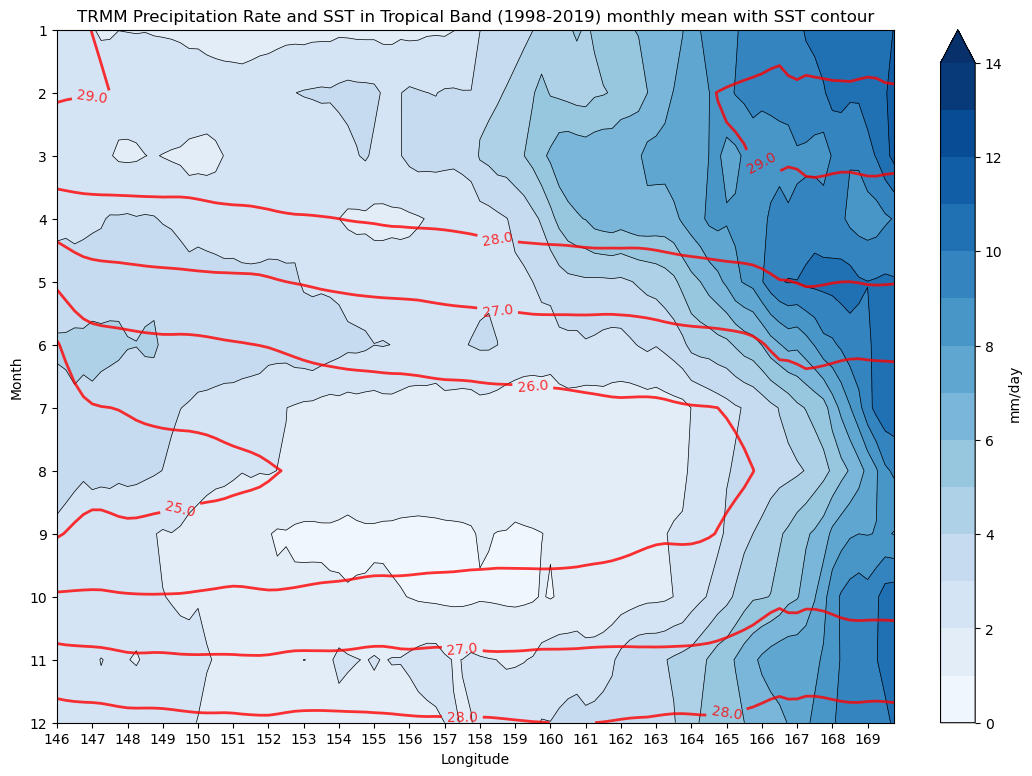

In [39]:
# Hovmoller diagram with Precipitation (countourf) and SST (contour)
precip_tropical_band = precip.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

precip_tropical_band_monthly = precip_tropical_band.groupby('time.month').mean(dim='time')

sst_tropical_band = sst_oisst.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')
sst_tropical_band_monthly = sst_tropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))

# Set the colorbar range from 0 to 13 mm/day with 20 levels
levels = np.linspace(0, 14, 15)  
plt.contourf(precip_tropical_band_monthly, cmap='Blues', levels=levels, extend='max')
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)


plt.contour(precip_tropical_band_monthly, colors='black', linewidths=0.5, levels=levels)

ax.clabel(plt.contour(sst_tropical_band_monthly, colors='red', linewidths=2, levels=np.arange(10, 35, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')

plt.xticks(np.arange(0, 96, 4), np.arange(146, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))

plt.title('TRMM Precipitation Rate and SST in Tropical Band (1998-2019) monthly mean with SST contour')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

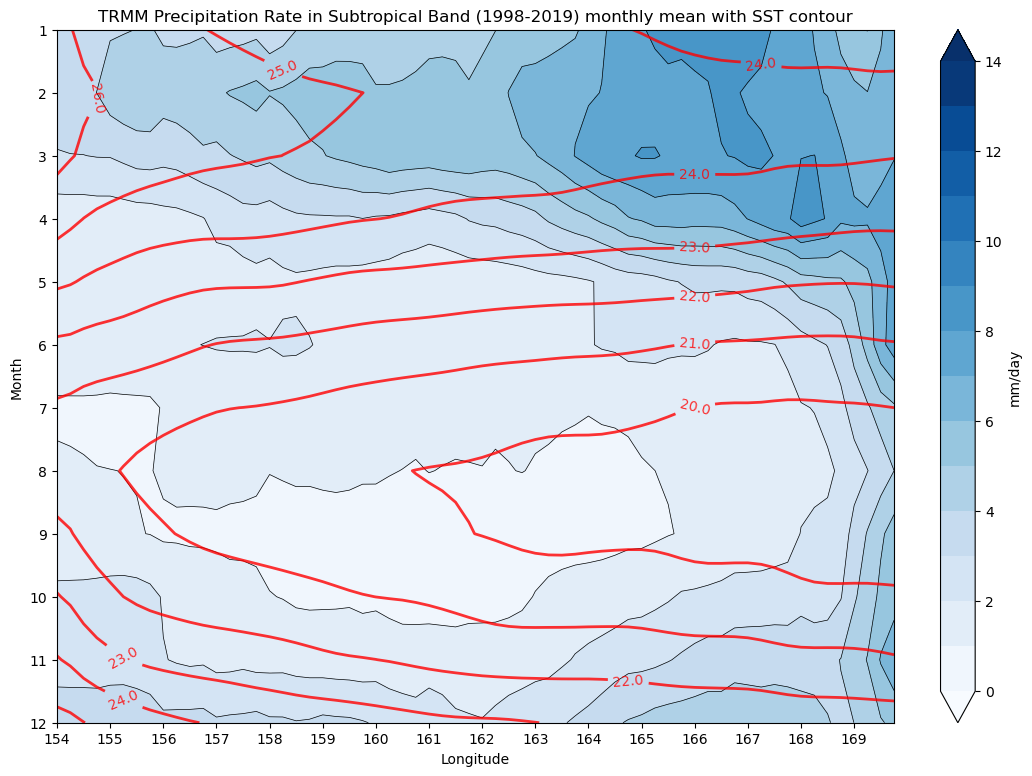

In [40]:
precip_subtropical_band = precip.sel(lat=slice(-30,-27), lon=slice(154,170)).mean(dim='lat')

precip_subtropical_band_monthly = precip_subtropical_band.groupby('time.month').mean(dim='time')

sst_subtropical_band = sst_oisst.sel(lat=slice(-30,-27), lon=slice(154,170)).mean(dim='lat')
sst_subtropical_band_monthly = sst_subtropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))
plt.contourf(precip_subtropical_band_monthly, cmap='Blues', levels=np.linspace(0, 14, 15) , extend='both')
plt.xticks(np.arange(0, 64, 4), np.arange(154, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)
plt.contour(precip_subtropical_band_monthly, colors='black', linewidths=0.5, levels=np.linspace(0, 14, 15))
plt.clabel(plt.contour(sst_subtropical_band_monthly, colors='red', linewidths=2, levels=np.arange(10, 30, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')

plt.title('TRMM Precipitation Rate in Subtropical Band (1998-2019) monthly mean with SST contour')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

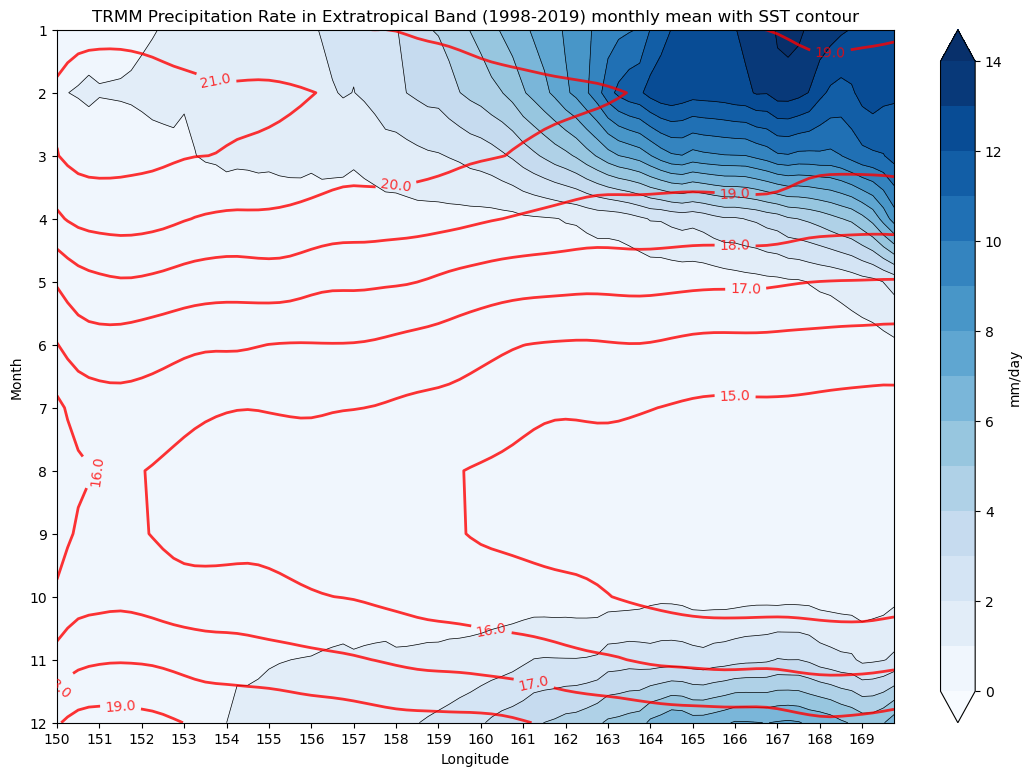

In [42]:
precip_extratropical_band = precip.sel(lat=slice(-40,-37), lon=slice(150,170)).mean(dim='lat')

precip_extratropical_band_monthly = precip_extratropical_band.groupby('time.month').mean(dim='time')

sst_extratropical_band = sst_oisst.sel(lat=slice(-40,-37), lon=slice(150,170)).mean(dim='lat')
sst_extratropical_band_monthly = sst_extratropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))
plt.contourf(precip_extratropical_band_monthly, cmap='Blues', levels=np.linspace(0, 14, 15) , extend='both')
plt.xticks(np.arange(0, 80, 4), np.arange(150, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)

plt.contour(precip_extratropical_band_monthly, colors='black', linewidths=0.5, levels=np.linspace(0, 14, 15))
plt.clabel(plt.contour(sst_extratropical_band_monthly, colors='red', linewidths=2, levels=np.arange(10, 30, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')
plt.title('TRMM Precipitation Rate in Extratropical Band (1998-2019) monthly mean with SST contour')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()